In [2]:
# Import necessary libraries
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
import matplotlib.path as mpath


Checkout the Y dataset

In [4]:
year = 2000
timestep = 1267

data = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Y/'+str(year))
data = data.assign_coords(lat_index=("lat_index", data.lat_index.values))
data

<xarray.Dataset>
Dimensions:    (time: 1464, lat_index: 32, lon: 256)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 ... 2000-12-31T18:00:00
    lat        (lat_index) float64 dask.array<chunksize=(32,), meta=np.ndarray>
  * lon        (lon) float64 -180.0 -178.6 -177.2 -175.8 ... 177.2 178.6 180.0
  * lat_index  (lat_index) int64 0 1 2 3 4 5 6 7 8 ... 24 25 26 27 28 29 30 31
Data variables:
    Y          (time, lat_index, lon) float64 dask.array<chunksize=(1464, 32, 256), meta=np.ndarray>

In [5]:
basins = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/AIS_basins_Zwally_MERRA2grid.nc').sel(lat = slice(-90,-60)).load()
basins = basins.Zwallybasins > 0

In [6]:
timestep_data = data.isel(time = timestep).load()


## Quicklook

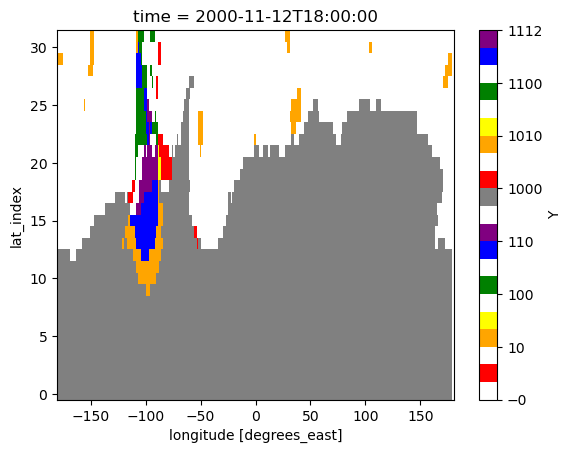

In [10]:
xr.plot.pcolormesh(timestep_data.Y, levels = [-.5,.5,1.5,9.5,10.5,11.5,99.5, 100.5, 109.5,110.5,111.5, 999.5,
                                      1000.5, 1001.5, 1009.5,1010.5,1011.5, 1099.5, 1100.5, 1109.5,1110.5,1111.5,], 
                   colors = ['none','red','none','orange','yellow','none','green','none','blue','purple', 'none', 
                             'grey','red','none','orange','yellow','none','green','none','blue','purple', 'none'],
                  )




# Nicer plot (Takes some time to run)

In [ ]:
#load maps
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',edgecolor='lightblue',facecolor='white') # 10m, 50m, 110m # edgecolor lightblue
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',edgecolor='none',facecolor='none') # 10m, 50m, 110m
ice_shelf_poly = cfeature.NaturalEarthFeature('physical', 'antarctic_ice_shelves_polys', '50m',edgecolor='none',facecolor='white') # 10m, 50m, 110m
ice_shelf_line = cfeature.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', '50m',edgecolor='black',facecolor='none') # 10m, 50m, 110m


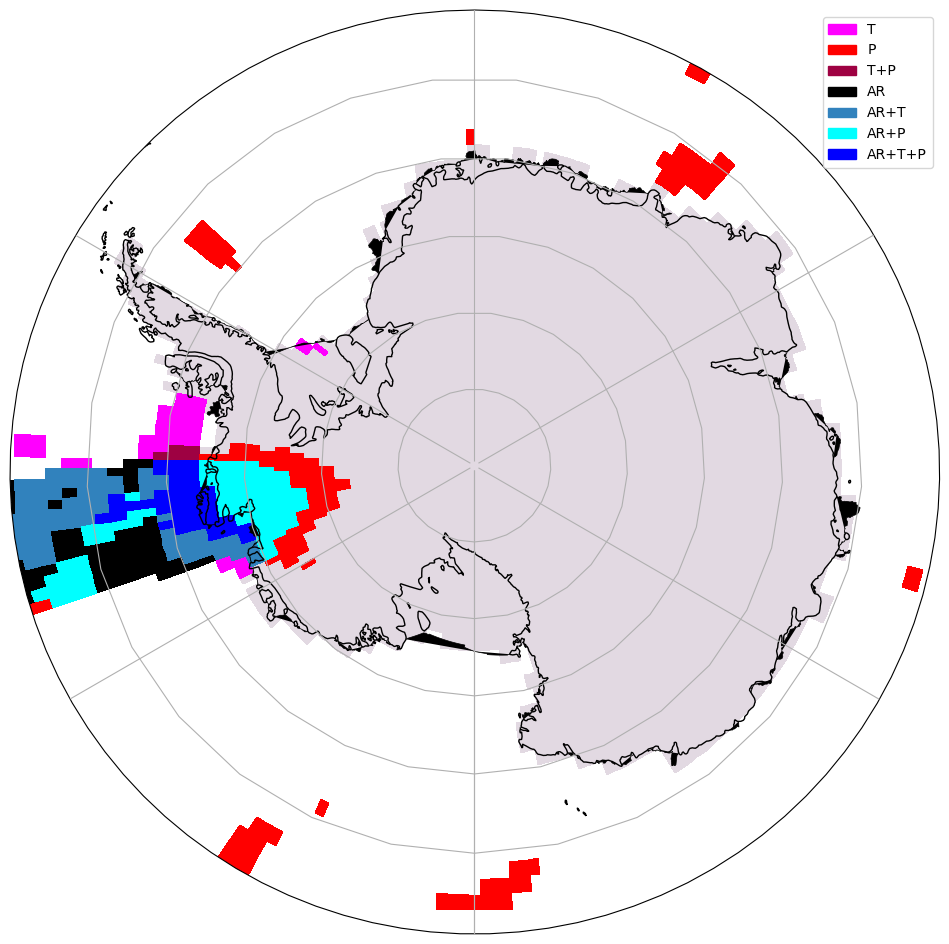

In [34]:

fig, ax=plt.subplots(ncols=1,nrows=1,figsize=(12,12),subplot_kw={'projection': ccrs.SouthPolarStereo(central_longitude=0)})


ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
grid=ax.gridlines(zorder = 20)
grid.n_steps=30


# continent mask
labels1 = ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, xr.where((timestep_data>=1000),1,np.nan ).Y,cmap = 'twilight', 
                        transform=ccrs.PlateCarree(), rasterized = True)

# temp
labels1 = ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, xr.where((timestep_data==1),1,np.nan ).Y,cmap = 'spring',transform=ccrs.PlateCarree())
labels1 = ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, xr.where((timestep_data ==1001),1,np.nan ).Y,cmap = 'spring',transform=ccrs.PlateCarree())

# precip
labels1 = ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, xr.where((timestep_data==10 ),1,np.nan ).Y,cmap = 'hsv',transform=ccrs.PlateCarree())
labels1 = ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, xr.where((timestep_data ==1010),1,np.nan ).Y,cmap = 'hsv',transform=ccrs.PlateCarree())

# temp + precip
labels1 = ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, xr.where((timestep_data==11),1,np.nan ).Y,cmap = 'Spectral',transform=ccrs.PlateCarree())
labels1 = ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, xr.where((timestep_data ==1011),1,np.nan ).Y,cmap = 'Spectral',transform=ccrs.PlateCarree())

# AR
labels1 = ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, xr.where((timestep_data==100),1,np.nan ).Y,cmap = 'gray',transform=ccrs.PlateCarree())
labels1 = ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, xr.where((timestep_data ==1100),1,np.nan ).Y,cmap = 'gray',transform=ccrs.PlateCarree())

# AR + temp
labels1 = ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, xr.where((timestep_data==101),1,np.nan ).Y,cmap = 'tab20c',transform=ccrs.PlateCarree())
labels1 = ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, xr.where((timestep_data ==1101),1,np.nan ).Y,cmap = 'tab20c',transform=ccrs.PlateCarree())

# AR + precip
labels1 = ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, xr.where((timestep_data==110),1,np.nan ).Y,cmap = 'cool',transform=ccrs.PlateCarree())
labels1 = ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, xr.where((timestep_data ==1110),1,np.nan ).Y,cmap = 'cool',transform=ccrs.PlateCarree())

# AR + precip + temp
labels1 = ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, xr.where((timestep_data==111),1,np.nan ).Y,cmap = 'winter',transform=ccrs.PlateCarree())
labels1 = ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, xr.where((timestep_data ==1111),1,np.nan ).Y,cmap = 'winter',transform=ccrs.PlateCarree())

rect = lambda color: plt.Rectangle((0,0),1,1, color=color)
legend = ax.legend([rect(plt.get_cmap('spring')(-1)), 
                    rect(plt.get_cmap('hsv')(-1)),
                    rect(plt.get_cmap('Spectral')(-1)),
                    rect(plt.get_cmap('gray')(-1)),
                    rect(plt.get_cmap('tab20c')(-1)),
                    rect(plt.get_cmap('cool')(-1)),
                    rect(plt.get_cmap('winter')(-1)),
                                       ], 
                   ["T","P","T+P", 
                    'AR',"AR+T","AR+P","AR+T+P" ])

ax.coastlines(resolution='50m', color = 'black',linewidth = 1,zorder = 11)
ax.add_feature(ice_shelf_line, color = 'black', linewidth = .5,zorder = 11)
